In [1]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

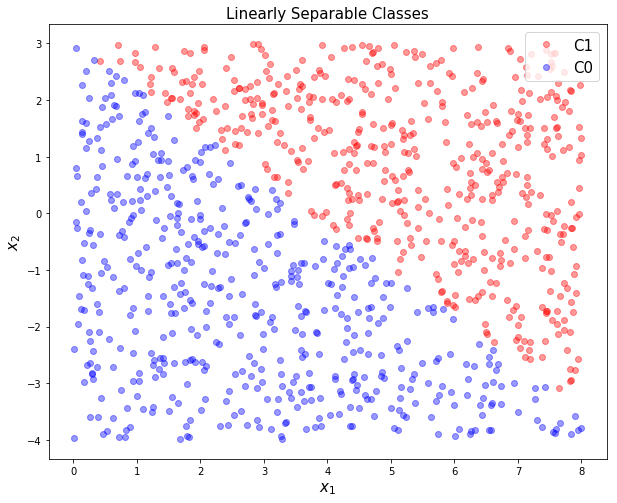

In [2]:

#training data gerneration
m = 1000
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4

g = 0.8*x1 + x2 - 3

C1 = np.where(g >= 0)[0]
C0 = np.where(g < 0)[0]
N = C1.shape[0]
M = C0.shape[0]
m = N + M

X1 = np.hstack([np.ones([N,1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([M,1]), x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_y = np.vstack([np.ones([N,1]), -np.ones([M,1])])

train_X = np.asmatrix(train_X)
train_y = np.asmatrix(train_y)

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.title('Linearly Separable Classes', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.show()

In [13]:
w=np.random.randn(3,1)
w=np.asmatrix(w)
lr=2
for i in range(1000):
    for j in range(train_X.shape[0]):
        if (train_X[j,:]*w)[0,0]*train_y[j,0]<0:
            w=w+lr*train_y[j,0]*train_X[j,:].T
            
            

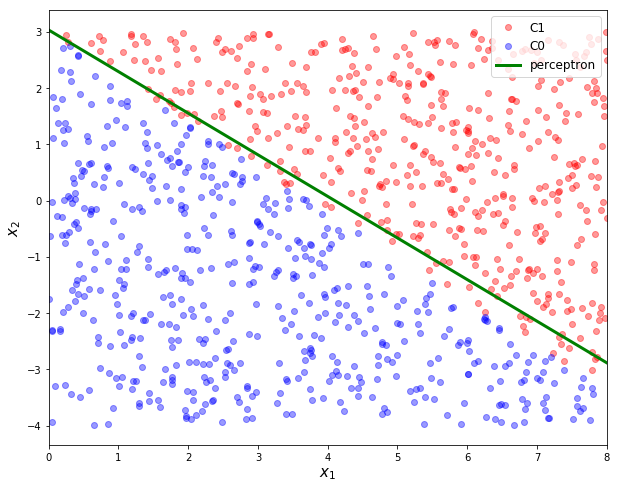

In [14]:
xp=np.linspace(0,9,500)
yp=-w[1,0]/w[2,0]*xp-w[0,0]/w[2,0]

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 3, label = 'perceptron')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.show()

In [3]:
import tensorflow as tf
train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])
train_y = np.asmatrix(train_y)

In [4]:
train_X= train_X[:,1:3]
print(train_X)

[[ 5.87857462 -1.58737666]
 [ 4.22162729  0.5377405 ]
 [ 4.68289476  2.10621874]
 ...
 [ 1.13729787 -0.58833225]
 [ 4.45945632 -3.04162619]
 [ 1.78208579 -3.01542567]]


In [17]:
def build_model(x,weights,bias):
    pred=tf.add(tf.matmul(x,weights['output']),bias['output'])
    return pred

In [18]:
n_input=2
n_output=1
weights={'output':tf.Variable(tf.random_normal([n_input,n_output],stddev=0.1),dtype=tf.float32)}
bias={'output':tf.Variable(tf.random_normal([n_output],stddev=0.1),dtype=tf.float32)}



In [19]:
lr=0.01
x=tf.placeholder(tf.float32,[None,n_input])
y=tf.placeholder(tf.float32,[None,n_output])

pred=build_model(x,weights,bias)
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=pred, labels=y)
loss = tf.reduce_mean(loss)


opt=tf.train.GradientDescentOptimizer(lr).minimize(loss)
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

for i in range(10000):
    _,l=sess.run([opt,loss],feed_dict={x:train_X,y:train_y})
    print(l)
    
w_res=sess.run(weights)
b_res=sess.run(bias)


0.67666173
0.6694412
0.6625354
0.65592885
0.64960575
0.6435514
0.6377509
0.63219035
0.626856
0.6217351
0.6168151
0.61208427
0.6075315
0.6031463
0.5989187
0.59483933
0.59089947
0.587091
0.58340627
0.579838
0.57637966
0.57302505
0.5697683
0.5666042
0.5635276
0.56053406
0.55761915
0.554779
0.55200976
0.54930824
0.54667103
0.54409516
0.541578
0.5391169
0.5367096
0.53435373
0.53204733
0.5297883
0.527575
0.52540565
0.52327865
0.52119243
0.5191458
0.51713735
0.5151657
0.51322985
0.5113287
0.50946105
0.507626
0.50582254
0.50404984
0.5023072
0.5005934
0.4989081
0.49725026
0.4956193
0.49401456
0.49243534
0.490881
0.48935094
0.48784468
0.48636153
0.48490113
0.48346278
0.4820461
0.48065054
0.4792757
0.47792107
0.47658622
0.47527075
0.47397432
0.47269642
0.47143665
0.47019473
0.46897027
0.46776295
0.46657234
0.4653982
0.4642401
0.46309784
0.46197098
0.46085933
0.45976257
0.45868036
0.4576125
0.45655873
0.45551866
0.45449218
0.45347893
0.45247877
0.45149133
0.4505165
0.44955394
0.44860348
0.44766498

0.30650574
0.30643538
0.306365
0.30629474
0.3062245
0.30615434
0.30608416
0.3060141
0.30594406
0.3058741
0.3058042
0.30573434
0.3056645
0.3055948
0.3055251
0.30545545
0.30538583
0.30531627
0.3052468
0.3051773
0.30510798
0.30503866
0.30496934
0.3049001
0.3048309
0.30476177
0.30469272
0.3046237
0.30455473
0.3044858
0.30441692
0.30434808
0.30427936
0.3042106
0.3041419
0.3040733
0.3040048
0.30393624
0.30386776
0.3037994
0.30373102
0.30366266
0.30359438
0.3035262
0.30345803
0.3033899
0.3033218
0.30325377
0.30318585
0.30311793
0.30305
0.3029822
0.30291444
0.3028467
0.30277902
0.3027114
0.30264384
0.3025763
0.3025088
0.3024414
0.30237398
0.30230665
0.30223936
0.30217212
0.3021049
0.30203775
0.30197063
0.3019036
0.30183658
0.30176958
0.3017027
0.30163583
0.30156904
0.30150223
0.30143553
0.30136883
0.30130222
0.30123565
0.3011691
0.3011026
0.30103615
0.30096975
0.3009034
0.30083707
0.30077085
0.3007046
0.30063844
0.30057234
0.30050623
0.30044022
0.30037427
0.3003083
0.30024236
0.3001765
0.30011

0.2586682
0.25862536
0.25858256
0.25853977
0.258497
0.25845423
0.25841153
0.25836876
0.25832608
0.2582834
0.2582408
0.2581981
0.25815552
0.2581129
0.25807035
0.25802782
0.2579853
0.25794274
0.2579003
0.25785783
0.25781533
0.25777292
0.2577305
0.25768813
0.25764576
0.2576034
0.25756106
0.25751877
0.25747648
0.2574342
0.25739196
0.25734976
0.25730753
0.25726536
0.25722316
0.257181
0.25713888
0.25709677
0.2570547
0.25701264
0.25697058
0.25692856
0.25688654
0.25684455
0.2568026
0.25676063
0.25671872
0.2566768
0.2566349
0.25659302
0.2565512
0.25650936
0.25646755
0.25642574
0.25638402
0.25634223
0.2563005
0.2562588
0.2562171
0.25617546
0.2561338
0.25609213
0.25605053
0.25600895
0.25596735
0.2559258
0.25588426
0.25584275
0.25580126
0.2557598
0.25571832
0.2556769
0.25563547
0.25559407
0.2555527
0.25551134
0.25547
0.2554287
0.25538737
0.2553461
0.2553048
0.2552636
0.25522235
0.25518116
0.25513998
0.25509882
0.25505766
0.25501654
0.25497544
0.25493437
0.25489327
0.25485224
0.2548112
0.25477016
0

0.23115493
0.2311243
0.23109365
0.23106302
0.23103239
0.23100176
0.23097122
0.23094061
0.23091006
0.23087952
0.23084898
0.23081845
0.23078793
0.23075745
0.23072696
0.23069647
0.230666
0.23063555
0.23060514
0.23057468
0.23054428
0.23051387
0.23048347
0.2304531
0.23042275
0.2303924
0.23036204
0.2303317
0.23030141
0.23027112
0.2302408
0.23021051
0.23018026
0.23015001
0.23011976
0.23008955
0.23005931
0.23002912
0.22999892
0.22996874
0.22993857
0.22990844
0.22987826
0.22984815
0.22981805
0.2297879
0.22975782
0.22972772
0.22969766
0.22966759
0.22963756
0.22960752
0.22957748
0.22954747
0.22951747
0.2294875
0.2294575
0.22942756
0.2293976
0.22936763
0.22933772
0.22930782
0.22927792
0.22924803
0.22921817
0.2291883
0.22915842
0.22912857
0.22909874
0.2290689
0.22903909
0.2290093
0.22897954
0.22894976
0.22892001
0.22889024
0.22886051
0.22883081
0.22880109
0.22877136
0.2287417
0.22871202
0.22868234
0.2286527
0.22862306
0.22859344
0.22856383
0.2285342
0.22850464
0.22847503
0.22844547
0.22841592
0.228

0.20913367
0.2091113
0.20908894
0.20906658
0.20904422
0.2090219
0.20899956
0.20897724
0.20895492
0.20893261
0.20891032
0.208888
0.20886569
0.20884342
0.20882115
0.20879889
0.20877662
0.20875436
0.20873211
0.20870988
0.20868765
0.20866543
0.20864323
0.20862104
0.20859884
0.20857663
0.20855448
0.20853229
0.2085101
0.20848794
0.20846578
0.20844363
0.20842151
0.20839939
0.20837724
0.20835513
0.20833303
0.20831093
0.20828883
0.20826675
0.2082447
0.20822261
0.20820054
0.20817849
0.20815645
0.2081344
0.20811236
0.20809035
0.20806834
0.20804633
0.20802432
0.20800233
0.20798035
0.20795836
0.20793638
0.20791443
0.20789245
0.20787053
0.20784858
0.20782664
0.20780472
0.20778278
0.20776087
0.20773897
0.2077171
0.20769519
0.20767331
0.20765142
0.20762956
0.2076077
0.20758586
0.20756403
0.20754215
0.20752034
0.2074985
0.20747669
0.20745488
0.20743309
0.20741129
0.2073895
0.20736772
0.20734595
0.2073242
0.20730244
0.20728067
0.20725894
0.20723721
0.20721549
0.20719378
0.20717204
0.20715034
0.20712866


0.19397745
0.19395994
0.19394244
0.19392495
0.19390745
0.19388998
0.19387248
0.19385505
0.19383757
0.19382009
0.19380264
0.19378516
0.19376773
0.19375029
0.19373286
0.19371541
0.193698
0.19368057
0.19366314
0.19364572
0.19362833
0.19361092
0.19359352
0.19357614
0.19355874
0.19354135
0.19352397
0.1935066
0.19348924
0.19347188
0.19345453
0.19343719
0.19341984
0.1934025
0.19338517
0.19336784
0.19335052
0.1933332
0.19331586
0.19329858
0.19328126
0.19326398
0.19324668
0.1932294
0.1932121
0.19319482
0.19317755
0.19316031
0.19314304
0.19312577
0.1931085
0.19309127
0.19307402
0.19305679
0.19303957
0.19302234
0.1930051
0.1929879
0.19297068
0.19295347
0.19293624
0.19291908
0.19290186
0.1928847
0.19286749
0.1928503
0.19283316
0.19281599
0.19279884
0.19278169
0.1927645
0.19274737
0.19273023
0.19271311
0.19269596
0.19267884
0.19266172
0.19264461
0.19262749
0.1926104
0.19259329
0.1925762
0.19255908
0.19254199
0.19252494
0.19250785
0.19249079
0.19247372
0.19245665
0.19243959
0.19242254
0.19240552
0.1

0.18184876
0.18183467
0.18182057
0.18180646
0.18179235
0.18177825
0.18176419
0.1817501
0.18173599
0.18172196
0.18170787
0.18169382
0.18167974
0.18166567
0.1816516
0.18163756
0.18162352
0.18160947
0.18159541
0.18158136
0.18156733
0.1815533
0.18153928
0.18152526
0.18151122
0.18149719
0.18148318
0.18146917
0.18145517
0.18144116
0.18142718
0.18141317
0.18139918
0.18138519
0.1813712
0.18135722
0.18134323
0.18132928
0.18131529
0.18130133
0.18128738
0.18127339
0.18125944
0.1812455
0.18123157
0.18121761
0.18120366
0.18118975
0.18117578
0.18116187
0.18114795
0.181134
0.18112008
0.18110617
0.18109225
0.18107836
0.18106444
0.18105054
0.18103664
0.18102273
0.18100885
0.18099496
0.18098108
0.1809672
0.18095334
0.18093945
0.18092556
0.18091172
0.18089786
0.18088399
0.18087015
0.18085629
0.18084241
0.1808286
0.18081473
0.18080093
0.1807871
0.18077326
0.18075943
0.1807456
0.18073179
0.18071797
0.18070418
0.18069035
0.18067656
0.18066274
0.18064895
0.18063515
0.18062134
0.18060757
0.18059377
0.18058002

0.17204374
0.17203206
0.17202038
0.1720087
0.17199703
0.17198537
0.17197369
0.17196202
0.17195036
0.1719387
0.17192705
0.1719154
0.17190373
0.1718921
0.17188047
0.17186879
0.17185716
0.17184553
0.17183389
0.17182226
0.17181064
0.171799
0.17178737
0.17177576
0.17176414
0.17175253
0.1717409
0.17172931
0.1717177
0.17170608
0.17169449
0.17168288
0.1716713
0.1716597
0.17164811
0.17163652
0.17162493
0.17161334
0.17160177
0.1715902
0.1715786
0.17156704
0.17155546
0.1715439
0.17153232
0.17152077
0.17150922
0.17149764
0.17148611
0.17147455
0.17146301
0.17145145
0.17143992
0.17142835
0.17141683
0.17140529
0.17139377
0.17138223
0.17137071
0.17135917
0.17134766
0.17133613
0.17132464
0.1713131
0.17130159
0.17129008
0.1712786
0.17126708
0.17125559
0.17124408
0.1712326
0.1712211
0.17120959
0.17119813
0.17118661
0.17117517
0.17116368
0.17115217
0.1711407
0.17112924
0.17111778
0.17110631
0.17109483
0.17108339
0.17107192
0.17106047
0.17104901
0.17103755
0.17102613
0.17101468
0.17100324
0.1709918
0.17098

0.16375427
0.16374442
0.16373456
0.1637247
0.16371486
0.16370504
0.16369519
0.16368537
0.16367552
0.16366568
0.16365585
0.16364603
0.1636362
0.16362639
0.16361655
0.16360673
0.16359694
0.1635871
0.16357729
0.16356747
0.16355768
0.16354786
0.16353805
0.16352823
0.16351843
0.16350865
0.16349885
0.16348906
0.16347927
0.16346946
0.16345969
0.16344988
0.1634401
0.16343032
0.16342053
0.16341077
0.163401
0.1633912
0.16338144
0.16337165
0.16336189
0.16335212
0.16334236
0.16333258
0.16332284
0.16331308
0.16330332
0.16329356
0.16328378
0.16327406
0.16326432
0.16325457
0.16324481
0.16323508
0.16322532
0.16321558
0.16320585
0.16319612
0.16318637
0.16317667
0.16316693
0.1631572
0.16314746
0.16313773
0.16312803
0.16311832
0.1631086
0.16309887
0.16308917
0.16307944
0.16306977
0.16306004
0.16305034
0.16304064
0.16303092
0.16302124
0.16301154
0.16300184
0.16299213
0.16298245
0.16297278
0.16296309
0.1629534
0.1629437
0.16293404
0.16292435
0.1629147
0.162905
0.16289534
0.16288567
0.16287601
0.16286635
0.

0.15672246
0.156714
0.15670557
0.1566971
0.15668868
0.15668023
0.15667178
0.15666333
0.1566549
0.15664649
0.15663803
0.1566296
0.15662117
0.15661275
0.1566043
0.15659589
0.15658747
0.15657903
0.15657061
0.1565622
0.15655378
0.15654537
0.15653695
0.15652853
0.15652011
0.1565117
0.15650329
0.15649489
0.1564865
0.15647809
0.15646969
0.15646128
0.1564529
0.15644449
0.15643609
0.15642768
0.15641929
0.1564109
0.15640251
0.15639414
0.15638575
0.15637736
0.15636897
0.15636058
0.1563522
0.15634383
0.15633546
0.15632708
0.15631871
0.15631033
0.15630196
0.15629359
0.15628523
0.15627685
0.15626849
0.15626013
0.15625177
0.15624343
0.15623507
0.1562267
0.15621834
0.15620999
0.15620163
0.15619329
0.15618496
0.15617658
0.15616825
0.1561599
0.15615155
0.15614322
0.15613486
0.15612654
0.1561182
0.15610988
0.15610152
0.15609321
0.15608487
0.15607655
0.1560682
0.15605989
0.15605158
0.15604325
0.15603493
0.15602662
0.1560183
0.15600997
0.15600164
0.15599334
0.15598504
0.15597674
0.15596841
0.15596011
0.155

0.15021692
0.15020962
0.15020236
0.15019509
0.15018784
0.15018056
0.15017328
0.15016602
0.15015873
0.15015149
0.1501442
0.15013695
0.1501297
0.15012243
0.15011518
0.1501079
0.15010068
0.15009342
0.15008616
0.1500789
0.15007165
0.15006441
0.15005717
0.15004991
0.15004267
0.15003543
0.15002818
0.15002094
0.1500137
0.15000646
0.1499992
0.14999199
0.14998473
0.1499775
0.14997028
0.14996304
0.14995581
0.1499486
0.14994135
0.14993411
0.14992692
0.14991966
0.14991245
0.14990522
0.14989801
0.14989081
0.14988357
0.14987636
0.14986913
0.14986192
0.1498547
0.1498475
0.14984027
0.14983307
0.14982587
0.14981866
0.14981146
0.14980426
0.14979704
0.14978985
0.14978264
0.14977543
0.14976823
0.14976105
0.14975384
0.14974664
0.14973946
0.14973226
0.14972506
0.1497179
0.14971071
0.14970352
0.14969632
0.14968914
0.14968194
0.14967476
0.14966759
0.14966041
0.14965323
0.14964604
0.14963888
0.14963168
0.14962451
0.14961734
0.14961016
0.149603
0.14959584
0.14958867
0.1495815
0.14957434
0.14956717
0.14956002
0.

0.14494763
0.14494123
0.14493482
0.14492841
0.144922
0.14491561
0.1449092
0.14490281
0.1448964
0.14489
0.1448836
0.14487721
0.1448708
0.14486441
0.14485802
0.14485162
0.14484522
0.14483884
0.14483246
0.14482607
0.14481968
0.1448133
0.14480692
0.14480054
0.14479417
0.14478777
0.1447814
0.144775
0.14476863
0.14476225
0.14475589
0.14474949
0.14474313
0.14473675
0.14473037
0.144724
0.14471762
0.14471124
0.14470488
0.1446985
0.14469214
0.14468578
0.14467941
0.14467306
0.1446667
0.14466034
0.14465399
0.14464763
0.14464128
0.14463492
0.14462855
0.1446222
0.14461584
0.1446095
0.14460313
0.1445968
0.14459044
0.14458407
0.14457773
0.1445714
0.14456503
0.14455868
0.14455234
0.14454599
0.14453964
0.14453329
0.14452697
0.14452061
0.14451428
0.14450796
0.14450161
0.14449528
0.14448895
0.14448264
0.14447631
0.14446996
0.14446364
0.14445731
0.14445096
0.14444464
0.14443833
0.144432
0.14442566
0.14441934
0.14441301
0.14440669
0.14440037
0.14439404
0.1443877
0.14438139
0.14437507
0.14436875
0.14436246
0

0.14032413
0.14031844
0.14031273
0.14030702
0.14030133
0.14029564
0.14028993
0.14028424
0.14027853
0.14027284
0.14026713
0.14026144
0.14025575
0.14025006
0.14024436
0.14023869
0.14023298
0.14022729
0.14022158
0.14021592
0.14021023
0.14020453
0.14019883
0.14019313
0.14018746
0.14018178
0.1401761
0.14017041
0.14016473
0.14015906
0.14015338
0.14014772
0.14014204
0.14013636
0.1401307
0.14012504
0.14011934
0.14011367
0.14010799
0.14010233
0.14009665
0.14009099
0.1400853
0.14007965
0.14007397
0.1400683
0.14006262
0.14005698
0.14005132
0.14004564
0.14003997
0.14003429
0.14002863
0.14002298
0.14001733
0.14001167
0.140006
0.14000036
0.13999473
0.13998906
0.13998342
0.13997775
0.1399721
0.13996644
0.13996081
0.13995515
0.13994953
0.13994387
0.13993822
0.13993257
0.13992693
0.13992128
0.13991562
0.13990997
0.13990432
0.1398987
0.13989304
0.1398874
0.13988177
0.13987611
0.13987046
0.13986482
0.13985917
0.13985357
0.13984793
0.1398423
0.13983667
0.13983104
0.1398254
0.13981977
0.13981415
0.13980854

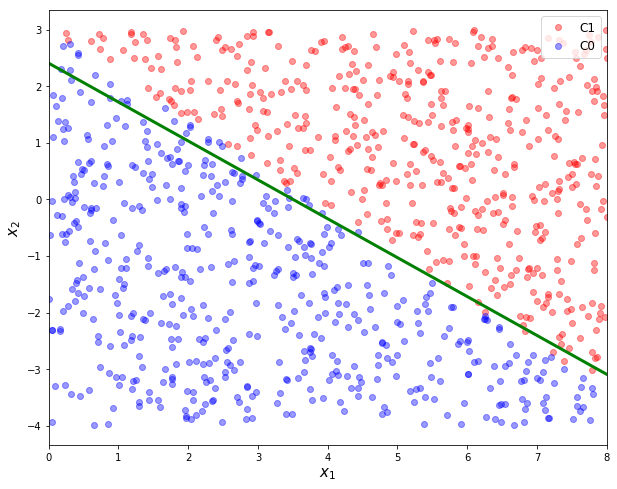

In [20]:
xp=np.linspace(0,9,500)
yp=-w_res['output'][0,0]/w_res['output'][1,0]*xp-b_res['output'][0]/w_res['output'][1,0]

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 3, label = '')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.show()

In [12]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

train_y = ohe.fit_transform(train_y).toarray()
print(train_y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [22]:
n_input=2
n_output=2

weights={'output':tf.Variable(tf.random_normal([n_input,n_output],stddev=0.1),dtype=tf.float32)}
bias={'output':tf.Variable(tf.random_normal([n_output],stddev=0.1),dtype=tf.float32)}


In [23]:
def build_model(x,weights,bias):
    pred=tf.add(tf.matmul(x,weights['output']),bias['output'])
    return pred

In [24]:
lr=0.01
x=tf.placeholder(tf.float32,[None,n_input])
y=tf.placeholder(tf.float32,[None,n_output])

pred=build_model(x,weights,bias)
loss = tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)
loss = tf.reduce_mean(loss)


opt=tf.train.GradientDescentOptimizer(lr).minimize(loss)
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

for i in range(10000):
    _,l=sess.run([opt,loss],feed_dict={x:train_X,y:train_y})
    print(l)
    
w_res=sess.run(weights)
b_res=sess.run(bias)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

0.5108021
0.5069347
0.503226
0.4996629
0.49623424
0.49293023
0.4897424
0.48666316
0.4836859
0.48080468
0.47801417
0.4753096
0.4726866
0.47014114
0.4676697
0.46526882
0.4629354
0.4606666
0.4584596
0.45631197
0.4542213
0.4521854
0.45020205
0.44826937
0.44638544
0.4445484
0.44275662
0.44100842
0.4393023
0.4376368
0.43601045
0.43442196
0.43287
0.43135333
0.42987084
0.4284214
0.42700392
0.42561725
0.42426053
0.42293277
0.4216331
0.42036054
0.41911426
0.4178936
0.4166975
0.41552553
0.4143767
0.41325048
0.4121461
0.411063
0.4100005
0.40895796
0.40793493
0.40693077
0.4059449
0.40497693
0.4040263
0.4030925
0.40217504
0.4012735
0.40038753
0.3995166
0.39866033
0.3978184
0.3969903
0.39617577
0.39537445
0.39458594
0.39381
0.39304617
0.3922942
0.3915539
0.39082485
0.39010677
0.38939947
0.38870263
0.388016
0.3873

0.26576355
0.26567096
0.26557845
0.2654861
0.2653938
0.26530161
0.26520944
0.26511744
0.26502544
0.26493365
0.26484188
0.2647502
0.26465866
0.26456717
0.26447576
0.26438448
0.26429328
0.26420215
0.26411107
0.26402017
0.2639293
0.26383856
0.26374787
0.2636573
0.2635668
0.26347637
0.26338604
0.26329583
0.2632057
0.26311567
0.2630257
0.2629358
0.26284602
0.26275632
0.26266667
0.26257715
0.26248774
0.26239836
0.26230907
0.26221994
0.26213083
0.26204184
0.2619529
0.26186407
0.2617753
0.2616867
0.2615981
0.26150963
0.2614212
0.26133293
0.26124468
0.26115656
0.26106852
0.2609805
0.2608926
0.2608048
0.2607171
0.26062945
0.2605419
0.26045448
0.26036707
0.26027977
0.26019257
0.26010546
0.26001844
0.25993142
0.25984457
0.2597578
0.2596711
0.2595845
0.2594979
0.25941142
0.25932512
0.25923878
0.25915256
0.25906643
0.25898036
0.2588944
0.25880855
0.25872275
0.258637
0.2585514
0.25846586
0.25838035
0.25829497
0.25820965
0.25812444
0.25803927
0.2579542
0.25786924
0.2577843
0.25769952
0.2576148
0.25753

0.21403664
0.21398845
0.21394031
0.21389218
0.2138441
0.21379605
0.21374804
0.21370006
0.21365212
0.21360418
0.21355632
0.21350849
0.21346067
0.2134129
0.21336514
0.21331744
0.21326977
0.21322213
0.21317454
0.21312699
0.21307942
0.21303192
0.21298446
0.212937
0.21288961
0.21284224
0.2127949
0.21274759
0.21270035
0.21265309
0.2126059
0.21255873
0.21251158
0.21246451
0.21241744
0.2123704
0.21232338
0.21227644
0.2122295
0.21218258
0.21213572
0.21208888
0.21204208
0.21199532
0.21194859
0.21190187
0.21185519
0.21180856
0.21176195
0.21171536
0.21166885
0.21162233
0.21157587
0.21152943
0.211483
0.21143663
0.21139029
0.21134396
0.2112977
0.21125144
0.21120523
0.21115904
0.21111292
0.21106677
0.2110207
0.21097466
0.21092862
0.21088263
0.2108367
0.21079075
0.21074486
0.21069899
0.21065319
0.2106074
0.21056163
0.21051589
0.21047015
0.21042451
0.21037887
0.21033327
0.2102877
0.21024214
0.21019666
0.21015117
0.21010572
0.2100603
0.21001492
0.20996958
0.20992425
0.20987897
0.2098337
0.20978847
0.209

0.18384646
0.1838172
0.18378794
0.18375869
0.1837295
0.1837003
0.18367109
0.18364191
0.18361273
0.1835836
0.18355447
0.18352534
0.18349627
0.18346716
0.1834381
0.18340904
0.18338001
0.18335098
0.183322
0.18329298
0.18326399
0.18323506
0.1832061
0.18317719
0.18314825
0.18311936
0.18309046
0.18306163
0.18303275
0.18300392
0.1829751
0.18294631
0.18291749
0.1828887
0.18285996
0.18283123
0.18280248
0.18277377
0.18274505
0.18271638
0.18268771
0.18265904
0.18263043
0.18260181
0.18257318
0.18254459
0.18251601
0.18248746
0.1824589
0.18243037
0.18240185
0.18237334
0.18234487
0.1823164
0.18228793
0.18225947
0.18223105
0.18220265
0.18217425
0.18214588
0.18211749
0.18208914
0.18206081
0.18203248
0.18200417
0.18197587
0.18194759
0.18191932
0.18189108
0.18186285
0.18183462
0.18180642
0.18177822
0.18175004
0.18172191
0.18169375
0.1816656
0.1816375
0.18160939
0.18158132
0.18155324
0.18152517
0.18149713
0.1814691
0.18144108
0.18141308
0.1813851
0.18135713
0.18132918
0.18130124
0.18127333
0.18124542
0.18

0.16338049
0.16336097
0.16334143
0.1633219
0.16330238
0.16328287
0.16326337
0.16324386
0.1632244
0.16320491
0.16318545
0.163166
0.16314653
0.1631271
0.16310765
0.16308822
0.1630688
0.1630494
0.16303
0.16301058
0.16299121
0.16297182
0.16295247
0.1629331
0.16291374
0.16289438
0.16287504
0.16285571
0.16283637
0.16281708
0.16279776
0.16277845
0.16275918
0.16273989
0.1627206
0.16270135
0.1626821
0.16266285
0.16264358
0.16262436
0.16260514
0.16258591
0.16256669
0.1625475
0.16252829
0.16250913
0.16248994
0.16247073
0.16245158
0.16243243
0.16241328
0.16239414
0.16237499
0.16235587
0.16233677
0.16231765
0.16229856
0.16227943
0.16226035
0.16224127
0.1622222
0.16220313
0.16218409
0.16216506
0.16214602
0.16212697
0.16210796
0.16208893
0.16206993
0.16205093
0.16203192
0.16201293
0.16199395
0.161975
0.16195604
0.16193709
0.16191812
0.16189918
0.16188027
0.16186133
0.16184244
0.1618235
0.1618046
0.1617857
0.16176683
0.16174795
0.16172907
0.1617102
0.16169137
0.1616725
0.16165365
0.16163485
0.16161601

0.14923052
0.14921632
0.14920211
0.14918791
0.1491737
0.14915952
0.14914532
0.14913113
0.14911696
0.14910279
0.1490886
0.14907445
0.14906031
0.14904615
0.14903198
0.14901784
0.1490037
0.14898956
0.14897543
0.14896132
0.14894721
0.14893308
0.14891897
0.14890486
0.14889075
0.14887667
0.14886256
0.14884847
0.14883439
0.14882031
0.14880623
0.14879216
0.14877811
0.14876407
0.14874998
0.14873593
0.14872189
0.14870785
0.14869383
0.14867978
0.14866577
0.14865173
0.14863773
0.14862372
0.14860971
0.1485957
0.1485817
0.1485677
0.14855374
0.14853974
0.14852576
0.1485118
0.1484978
0.14848386
0.14846988
0.14845593
0.14844199
0.14842802
0.14841408
0.14840014
0.14838623
0.14837228
0.14835836
0.14834444
0.14833052
0.14831662
0.14830272
0.14828882
0.1482749
0.14826103
0.14824715
0.14823326
0.14821939
0.14820552
0.14819163
0.14817777
0.14816393
0.14815007
0.14813621
0.14812237
0.14810853
0.14809468
0.14808087
0.14806704
0.14805321
0.1480394
0.14802559
0.14801176
0.14799798
0.14798418
0.14797038
0.1479566

0.13924275
0.13923167
0.13922058
0.1392095
0.13919842
0.13918732
0.13917623
0.13916516
0.13915409
0.13914303
0.13913198
0.1391209
0.13910985
0.13909878
0.13908774
0.1390767
0.13906564
0.1390546
0.13904358
0.13903253
0.1390215
0.13901047
0.13899943
0.13898842
0.1389774
0.13896638
0.13895537
0.13894436
0.13893333
0.13892233
0.13891135
0.13890034
0.13888936
0.13887836
0.13886736
0.13885638
0.1388454
0.13883443
0.13882343
0.13881247
0.1388015
0.13879055
0.13877957
0.13876861
0.13875765
0.13874671
0.13873574
0.1387248
0.13871387
0.13870291
0.13869198
0.13868102
0.1386701
0.13865918
0.13864826
0.13863735
0.1386264
0.13861549
0.13860458
0.13859366
0.13858277
0.13857186
0.13856097
0.13855004
0.13853915
0.13852826
0.13851738
0.13850649
0.13849562
0.13848475
0.13847387
0.13846298
0.1384521
0.13844123
0.13843039
0.13841951
0.13840866
0.13839781
0.13838695
0.1383761
0.13836527
0.1383544
0.13834357
0.13833275
0.1383219
0.13831109
0.13830023
0.1382894
0.13827859
0.13826777
0.13825695
0.13824615
0.13

0.13125332
0.13124438
0.1312354
0.13122647
0.13121751
0.13120855
0.13119961
0.13119067
0.13118175
0.13117279
0.13116387
0.13115494
0.13114601
0.13113709
0.13112815
0.13111924
0.13111031
0.13110138
0.13109246
0.13108355
0.13107464
0.13106573
0.13105682
0.13104792
0.13103901
0.1310301
0.1310212
0.1310123
0.13100341
0.13099451
0.13098562
0.13097674
0.13096786
0.13095897
0.1309501
0.13094121
0.13093233
0.13092345
0.13091457
0.1309057
0.13089682
0.13088796
0.1308791
0.13087024
0.13086137
0.13085252
0.13084365
0.1308348
0.13082595
0.13081709
0.13080826
0.13079943
0.13079058
0.13078174
0.13077289
0.13076405
0.13075522
0.13074638
0.13073754
0.13072875
0.13071992
0.13071108
0.13070226
0.13069344
0.13068463
0.1306758
0.13066699
0.13065818
0.13064937
0.13064057
0.13063176
0.13062295
0.13061416
0.13060535
0.13059656
0.13058777
0.13057898
0.13057019
0.1305614
0.13055263
0.13054386
0.13053507
0.13052629
0.13051751
0.13050875
0.13049997
0.1304912
0.13048242
0.13047366
0.13046491
0.13045615
0.13044739

0.12502821
0.12502074
0.12501323
0.12500575
0.12499824
0.12499077
0.12498327
0.124975786
0.1249683
0.12496082
0.12495334
0.12494585
0.12493836
0.124930896
0.124923415
0.12491595
0.12490848
0.124901004
0.12489354
0.124886066
0.12487861
0.124871135
0.12486366
0.124856204
0.12484875
0.12484129
0.12483383
0.12482639
0.12481892
0.124811485
0.12480404
0.12479659
0.12478915
0.12478169
0.124774255
0.12476681
0.12475936
0.124751925
0.124744505
0.12473707
0.124729626
0.124722205
0.12471477
0.12470734
0.12469991
0.124692485
0.12468506
0.12467764
0.12467023
0.12466281
0.1246554
0.12464798
0.12464057
0.12463316
0.12462575
0.12461834
0.12461093
0.12460352
0.12459611
0.12458869
0.12458131
0.124573916
0.12456651
0.12455913
0.12455174
0.124544345
0.124536954
0.124529555
0.12452217
0.12451479
0.12450739
0.12450001
0.12449263
0.12448525
0.12447787
0.124470495
0.124463126
0.12445577
0.124448396
0.12444101
0.124433644
0.124426275
0.1244189
0.12441155
0.12440419
0.12439684
0.12438946
0.124382116
0.12437476


0.11951153
0.119505174
0.11949882
0.119492486
0.11948612
0.119479775
0.11947344
0.11946711
0.11946077
0.119454436
0.11944811
0.11944177
0.11943542
0.119429104
0.11942277
0.119416445
0.119410105
0.11940379
0.119397454
0.11939112
0.1193848
0.119378485
0.119372174
0.119365856
0.11935954
0.11935322
0.11934691
0.11934059
0.11933427
0.119327955
0.11932165
0.11931534
0.11930902
0.119302705
0.119296394
0.1192901
0.1192838
0.11927751
0.1192712
0.119264916
0.1192586
0.1192523
0.11924602
0.119239725
0.11923342
0.11922712
0.11922082
0.11921454
0.11920825
0.119201966
0.119195685
0.11918939
0.11918312
0.119176835
0.119170554
0.11916427
0.119158
0.11915172
0.11914544
0.11913916
0.11913289
0.1191266
0.11912034
0.119114056
0.1191078
0.119101524
0.119095266
0.11908901
0.119082734
0.119076476
0.11907022
0.119063966
0.11905769
0.119051434
0.119045176
0.11903892
0.11903266
0.119026415
0.11902015
0.11901391
0.11900766
0.11900142
0.11899516
0.118988924
0.11898267
0.118976444
0.118970186
0.11896395
0.1189577


0.11515249
0.11514695
0.11514143
0.11513589
0.11513037
0.115124844
0.11511933
0.1151138
0.11510829
0.115102775
0.11509726
0.11509173
0.11508621
0.1150807
0.11507517
0.115069665
0.11506415
0.11505862
0.11505311
0.1150476
0.1150421
0.11503659
0.11503108
0.11502557
0.11502008
0.115014575
0.11500906
0.11500357
0.114998065
0.11499255
0.11498705
0.114981554
0.114976056
0.11497056
0.11496506
0.11495957
0.11495406
0.11494857
0.1149431
0.11493759
0.11493211
0.11492662
0.114921145
0.11491565
0.11491016
0.11490468
0.114899196
0.114893705
0.11488821
0.11488275
0.11487726
0.11487177
0.114866294
0.114860825
0.11485534
0.114849865
0.11484439
0.11483891
0.11483346
0.11482798
0.11482251
0.11481704
0.11481157
0.114806116
0.11480065
0.11479518
0.1147897
0.11478424
0.11477877
0.11477332
0.114767835
0.11476238
0.11475693
0.11475147
0.11474601
0.11474057
0.114735104
0.11472966
0.1147242
0.11471875
0.114713304
0.11470786
0.11470241
0.11469694
0.11469148
0.11468604
0.1146806
0.11467516
0.11466971
0.11466429
0

0.11096454
0.11095974
0.11095493
0.11095012
0.110945314
0.1109405
0.110935695
0.11093088
0.110926084
0.11092127
0.110916466
0.11091166
0.11090687
0.11090205
0.11089725
0.11089243
0.110887624
0.11088283
0.11087802
0.11087323
0.11086843
0.11086363
0.11085884
0.110854045
0.11084925
0.11084445
0.110839665
0.11083488
0.11083008
0.11082529
0.1108205
0.11081571
0.11081091
0.11080614
0.11080134
0.11079655
0.110791765
0.11078699
0.11078219
0.11077741
0.11077264
0.110767856
0.11076308
0.11075828
0.11075351
0.11074873
0.11074396
0.11073918
0.1107344
0.110729635
0.11072485
0.11072008
0.1107153
0.110710524
0.11070575
0.11070099
0.11069621
0.11069144
0.11068666
0.1106819
0.11067712
0.110672355
0.110667594
0.11066283
0.110658064
0.110653296
0.11064854
0.11064379
0.11063903
0.11063426
0.1106295
0.110624745
0.11061999
0.11061523
0.11061047
0.1106057
0.110600956
0.110596195
0.11059144
0.11058669
0.110581934
0.11057719
0.110572435
0.1105677
0.11056294
0.11055819
0.11055346
0.110548705
0.11054395
0.110539

0.10740668
0.10740244
0.107398175
0.107393906
0.10738966
0.1073854
0.10738115
0.10737689
0.107372634
0.10736838
0.10736412
0.10735987
0.107355624
0.10735138
0.10734713
0.107342884
0.10733863
0.1073344
0.10733014
0.1073259
0.10732166
0.10731741
0.10731317
0.10730892
0.10730467
0.10730043
0.10729619
0.10729193
0.107287705
0.10728347
0.10727922
0.10727498
0.10727074
0.1072665
0.107262254
0.10725803
0.10725378
0.10724955
0.107245326
0.10724109
0.10723686
0.10723263
0.10722839
0.10722417
0.107219934
0.1072157
0.10721148
0.107207246
0.107203014
0.10719878
0.10719456
0.10719034
0.1071861
0.10718188
0.10717766
0.10717343
0.107169196
0.10716497
0.107160755
0.10715652
0.10715231
0.107148096
0.10714389
0.10713966
0.10713545
0.107131235
0.10712702
0.107122794
0.107118584
0.107114375
0.10711015
0.10710593
0.10710172
0.10709752
0.1070933
0.10708908
0.10708488
0.10708067
0.10707645
0.107072234
0.107068025
0.107063815
0.107059605
0.1070554
0.1070512
0.10704701
0.107042804
0.107038595
0.10703439
0.1070

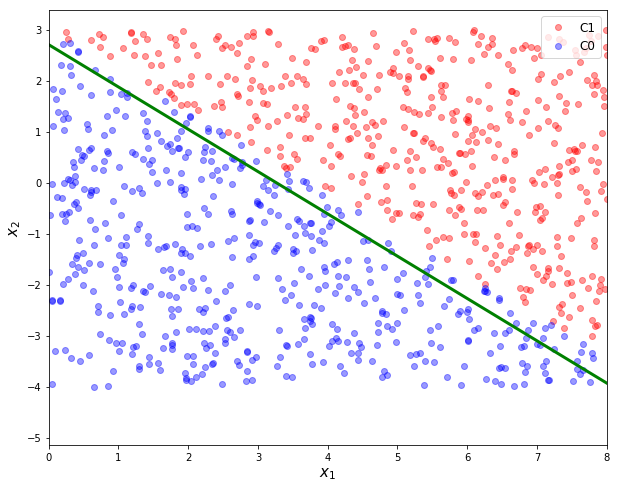

In [25]:
xp=np.linspace(0,9,500)
yp=-w_res['output'][0,0]/w_res['output'][1,0]*xp-b_res['output'][0]/w_res['output'][1,0]

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 3, label = '')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.show()

In [5]:

n_input = 2
n_hidden = 3
n_output = 2

In [9]:
def build_model(x,weights,bias):
    hidden=tf.add(tf.matmul(x,weights['hidden']),bias['hidden'])
    output=tf.add(tf.matmul(hidden,weights['output']),bias['output'])
    return output

In [10]:
weights={'hidden':tf.Variable(tf.random_normal([n_input,n_hidden],stddev=0.1)),
        'output':tf.Variable(tf.random_normal([n_hidden,n_output],stddev=0.1))}
bias={'hidden':tf.Variable(tf.random_normal([n_hidden],stddev=0.1)),
        'output':tf.Variable(tf.random_normal([n_output],stddev=0.1))}

0.6762153
0.6761418
0.6760682
0.6759945
0.6759208
0.6758472
0.6757735
0.6756997
0.67562604
0.6755523
0.6754786
0.6754048
0.675331
0.6752572
0.67518336
0.6751095
0.67503566
0.67496186
0.6748879
0.67481405
0.67474014
0.6746662
0.67459214
0.6745181
0.6744442
0.6743701
0.67429614
0.67422205
0.674148
0.6740739
0.67399967
0.6739256
0.6738514
0.6737772
0.6737031
0.6736288
0.67355454
0.6734802
0.6734059
0.6733316
0.6732573
0.6731829
0.67310846
0.673034
0.67295957
0.67288506
0.67281055
0.6727361
0.6726615
0.67258686
0.67251235
0.67243767
0.67236304
0.6722883
0.6722136
0.67213887
0.672064
0.67198926
0.67191446
0.6718395
0.6717647
0.6716898
0.6716148
0.67153984
0.67146486
0.67138976
0.6713148
0.6712396
0.6711645
0.67108935
0.6710141
0.67093897
0.6708636
0.6707884
0.670713
0.6706376
0.6705624
0.6704869
0.67041147
0.670336
0.67026037
0.6701849
0.67010933
0.6700337
0.669958
0.6698823
0.6698066
0.66973084
0.6696551
0.6695792
0.6695034
0.66942745
0.66935164
0.66927564
0.6691996
0.66912353
0.66904736
0

0.5948333
0.5947032
0.594573
0.5944428
0.5943125
0.5941821
0.59405166
0.59392107
0.5937905
0.5936598
0.59352905
0.59339815
0.59326726
0.59313625
0.5930051
0.592874
0.5927428
0.59261143
0.5924801
0.5923487
0.59221715
0.5920856
0.5919539
0.5918221
0.59169024
0.5915584
0.5914264
0.5912943
0.59116215
0.59102994
0.5908977
0.59076536
0.59063286
0.5905005
0.59036785
0.5902352
0.5901025
0.58996975
0.5898368
0.58970386
0.5895708
0.5894377
0.58930457
0.58917135
0.589038
0.5889046
0.5887711
0.5886376
0.588504
0.5883704
0.5882366
0.58810276
0.5879689
0.58783484
0.58770084
0.5875667
0.58743256
0.5872982
0.58716387
0.5870295
0.58689505
0.58676046
0.5866258
0.58649117
0.58635634
0.5862216
0.58608663
0.5859516
0.58581656
0.5856814
0.5855462
0.58541095
0.5852756
0.58514017
0.5850047
0.58486915
0.58473355
0.58459777
0.58446205
0.5843262
0.5841903
0.58405435
0.5839183
0.58378214
0.583646
0.58350974
0.58337337
0.58323693
0.58310044
0.58296394
0.5828273
0.58269066
0.5825539
0.58241713
0.5822802
0.58214325


0.46895823
0.46881434
0.46867055
0.46852675
0.4683831
0.4682394
0.46809584
0.46795234
0.46780884
0.4676655
0.4675221
0.4673789
0.46723565
0.46709248
0.4669494
0.46680638
0.46666342
0.46652058
0.4663777
0.46623492
0.46609223
0.46594962
0.46580705
0.4656645
0.46552202
0.46537963
0.46523732
0.46509507
0.4649529
0.46481073
0.46466863
0.46452668
0.46438476
0.46424288
0.46410108
0.46395934
0.46381766
0.46367607
0.46353447
0.463393
0.46325162
0.4631103
0.46296898
0.46282777
0.46268666
0.46254554
0.46240452
0.46226358
0.4621227
0.4619819
0.46184117
0.46170044
0.46155986
0.46141934
0.4612788
0.46113843
0.46099812
0.46085784
0.46071762
0.46057752
0.46043745
0.4602975
0.4601575
0.46001768
0.4598779
0.4597382
0.45959854
0.45945895
0.4593194
0.45918003
0.45904064
0.45890135
0.4587621
0.45862293
0.4584839
0.45834485
0.4582059
0.45806706
0.4579282
0.45778948
0.45765084
0.45751226
0.45737374
0.45723528
0.45709687
0.45695862
0.45682037
0.45668226
0.45654413
0.45640612
0.45626825
0.45613033
0.45599252
0

0.3784109
0.3783329
0.378255
0.37817708
0.3780993
0.37802157
0.3779439
0.37786633
0.3777888
0.37771133
0.37763396
0.37755668
0.37747943
0.37740225
0.37732515
0.37724808
0.37717113
0.37709424
0.37701744
0.37694064
0.37686396
0.3767873
0.37671074
0.37663427
0.37655786
0.3764815
0.3764052
0.37632897
0.37625286
0.37617674
0.37610075
0.3760248
0.37594888
0.37587312
0.37579733
0.37572172
0.37564608
0.37557057
0.37549505
0.37541965
0.3753443
0.37526906
0.3751938
0.37511867
0.3750436
0.37496862
0.37489367
0.37481877
0.37474403
0.37466925
0.37459457
0.3745199
0.37444547
0.37437096
0.37429655
0.37422222
0.37414795
0.3740737
0.37399957
0.3739255
0.37385148
0.37377754
0.3737037
0.37362984
0.37355605
0.37348235
0.37340876
0.37333524
0.37326172
0.37318832
0.37311497
0.37304166
0.3729684
0.37289527
0.37282214
0.37274912
0.37267613
0.37260327
0.3725304
0.37245762
0.37238488
0.37231225
0.37223965
0.37216717
0.37209466
0.3720223
0.37194994
0.37187773
0.37180552
0.37173337
0.37166128
0.37158927
0.3715173

0.33335438
0.33331212
0.33326995
0.33322772
0.3331856
0.3331435
0.3331014
0.33305928
0.3330172
0.33297524
0.33293322
0.33289126
0.3328493
0.33280742
0.33276552
0.33272365
0.33268183
0.33264002
0.3325982
0.33255646
0.33251467
0.33247295
0.3324313
0.33238965
0.332348
0.33230636
0.33226484
0.3322232
0.33218166
0.3321402
0.3320987
0.33205724
0.3320158
0.3319744
0.33193308
0.33189166
0.33185035
0.331809
0.33176777
0.3317265
0.33168527
0.3316441
0.33160287
0.33156174
0.3315206
0.33147946
0.33143842
0.33139732
0.33135632
0.33131528
0.3312743
0.33123332
0.33119237
0.33115146
0.3311106
0.33106974
0.33102888
0.33098805
0.33094728
0.33090648
0.3308657
0.330825
0.33078435
0.33074364
0.330703
0.33066243
0.33062178
0.3305812
0.33054066
0.33050016
0.33045965
0.33041915
0.33037865
0.33033827
0.33029786
0.33025748
0.3302171
0.33017677
0.33013645
0.33009616
0.33005592
0.3300157
0.32997546
0.32993525
0.32989508
0.32985494
0.32981482
0.3297747
0.32973462
0.32969457
0.32965454
0.32961455
0.32957458
0.32953

0.30417967
0.304151
0.30412233
0.3040937
0.304065
0.3040364
0.30400777
0.3039792
0.30395055
0.30392194
0.30389336
0.30386478
0.30383623
0.30380768
0.30377913
0.30375054
0.30372202
0.30369347
0.30366498
0.30363646
0.30360797
0.3035795
0.30355102
0.30352256
0.30349407
0.30346563
0.3034372
0.30340874
0.3033803
0.30335194
0.3033235
0.3032951
0.30326673
0.30323833
0.30321
0.3031816
0.30315325
0.30312487
0.30309656
0.30306825
0.3030399
0.3030116
0.3029833
0.30295503
0.30292672
0.30289844
0.3028702
0.30284193
0.30281365
0.30278543
0.3027572
0.30272898
0.3027008
0.30267256
0.30264437
0.30261618
0.30258802
0.30255985
0.3025317
0.3025035
0.30247536
0.3024472
0.3024191
0.302391
0.3023629
0.30233476
0.30230668
0.30227864
0.3022505
0.30222243
0.3021944
0.30216634
0.3021383
0.30211028
0.30208224
0.30205426
0.3020262
0.30199823
0.3019702
0.30194226
0.3019143
0.30188632
0.30185837
0.30183038
0.30180246
0.30177453
0.3017466
0.30171868
0.3016908
0.30166286
0.30163503
0.3016071
0.30157924
0.30155137
0.30

0.2826802
0.2826569
0.28263357
0.28261024
0.28258693
0.28256357
0.2825403
0.28251696
0.28249365
0.28247038
0.28244707
0.28242376
0.2824005
0.28237718
0.28235394
0.2823307
0.2823074
0.2822841
0.28226086
0.28223765
0.28221434
0.2821911
0.28216788
0.28214464
0.2821214
0.28209817
0.28207496
0.28205177
0.2820285
0.2820053
0.2819821
0.28195888
0.28193566
0.2819125
0.2818893
0.2818661
0.28184292
0.2818198
0.28179657
0.28177345
0.28175026
0.2817271
0.28170395
0.28168082
0.28165767
0.2816345
0.28161138
0.28158826
0.28156513
0.281542
0.28151888
0.28149572
0.28147265
0.28144956
0.28142646
0.28140336
0.28138024
0.28135714
0.28133407
0.281311
0.28128794
0.28126484
0.28124177
0.2812187
0.28119564
0.28117257
0.28114957
0.28112653
0.28110346
0.28108045
0.2810574
0.28103435
0.28101134
0.28098828
0.2809653
0.2809423
0.28091928
0.28089628
0.28087327
0.2808503
0.2808273
0.28080434
0.2807813
0.28075835
0.28073534
0.2807124
0.28068945
0.28066647
0.28064352
0.28062057
0.28059763
0.28057468
0.28055176
0.28052

0.26423094
0.2642107
0.2641904
0.2641701
0.26414984
0.26412955
0.2641093
0.26408905
0.26406878
0.26404852
0.26402828
0.26400802
0.26398775
0.26396754
0.2639473
0.26392704
0.2639068
0.26388657
0.26386634
0.2638461
0.26382586
0.26380566
0.26378542
0.26376522
0.263745
0.2637248
0.2637046
0.2636844
0.2636642
0.26364398
0.26362377
0.26360357
0.2635834
0.26356325
0.263543
0.26352286
0.2635027
0.2634825
0.26346233
0.26344216
0.26342198
0.26340184
0.26338166
0.2633615
0.26334134
0.2633212
0.26330104
0.26328093
0.26326075
0.2632406
0.2632205
0.2632003
0.2631802
0.26316005
0.26313996
0.26311985
0.26309973
0.26307958
0.26305947
0.26303938
0.26301926
0.26299915
0.26297906
0.26295894
0.26293886
0.26291877
0.26289868
0.26287857
0.2628585
0.26283842
0.26281834
0.26279825
0.26277816
0.2627581
0.26273805
0.26271796
0.2626979
0.26267785
0.26265782
0.26263773
0.2626177
0.26259765
0.2625776
0.26255757
0.26253754
0.26251748
0.26249745
0.26247746
0.2624574
0.26243734
0.26241732
0.26239735
0.26237732
0.26235

0.24746689
0.24744888
0.24743088
0.24741292
0.24739493
0.24737692
0.24735895
0.24734099
0.24732299
0.247305
0.24728705
0.2472691
0.24725112
0.24723314
0.24721517
0.24719721
0.24717925
0.2471613
0.24714336
0.2471254
0.24710742
0.24708949
0.24707155
0.24705361
0.24703565
0.24701773
0.24699979
0.24698186
0.24696392
0.24694599
0.24692805
0.24691015
0.24689223
0.24687429
0.24685636
0.24683848
0.24682055
0.24680263
0.24678473
0.2467668
0.24674891
0.24673101
0.24671309
0.24669522
0.24667732
0.24665943
0.24664155
0.24662364
0.24660577
0.24658787
0.24656998
0.24655211
0.24653423
0.24651636
0.24649853
0.24648061
0.24646276
0.2464449
0.24642701
0.24640918
0.24639133
0.24637347
0.24635561
0.24633776
0.24631993
0.24630208
0.24628423
0.24626641
0.24624854
0.2462307
0.24621288
0.24619506
0.24617721
0.2461594
0.24614155
0.24612375
0.24610594
0.24608813
0.24607031
0.24605247
0.24603467
0.24601686
0.24599905
0.24598126
0.24596344
0.24594565
0.24592784
0.24591005
0.24589224
0.24587446
0.24585666
0.245838

0.23316076
0.23314458
0.23312837
0.2331122
0.233096
0.23307982
0.23306362
0.23304746
0.23303129
0.2330151
0.23299892
0.23298274
0.23296659
0.2329504
0.23293424
0.23291805
0.23290189
0.23288575
0.2328696
0.23285343
0.23283726
0.23282112
0.23280497
0.2327888
0.23277268
0.23275651
0.23274037
0.23272425
0.23270807
0.23269194
0.23267579
0.23265967
0.23264356
0.2326274
0.23261128
0.23259516
0.23257902
0.2325629
0.23254678
0.23253067
0.23251458
0.23249844
0.23248234
0.23246622
0.2324501
0.23243403
0.23241791
0.23240179
0.23238571
0.23236959
0.23235351
0.23233742
0.2323213
0.23230524
0.23228912
0.23227303
0.23225698
0.23224089
0.23222479
0.23220873
0.23219264
0.23217657
0.2321605
0.23214445
0.23212834
0.23211229
0.23209624
0.23208018
0.23206413
0.23204805
0.23203199
0.23201594
0.23199987
0.23198381
0.23196778
0.23195173
0.23193568
0.23191963
0.2319036
0.23188756
0.23187152
0.23185548
0.23183945
0.2318234
0.23180738
0.23179136
0.23177534
0.23175931
0.2317433
0.23172726
0.23171124
0.23169523
0.2

0.22022983
0.22021522
0.2202006
0.22018598
0.22017136
0.22015674
0.22014213
0.22012752
0.22011289
0.2200983
0.2200837
0.22006908
0.22005446
0.22003986
0.22002527
0.22001068
0.21999606
0.21998148
0.21996686
0.21995229
0.2199377
0.21992308
0.2199085
0.21989395
0.21987934
0.21986474
0.21985018
0.21983561
0.21982105
0.21980648
0.2197919
0.21977732
0.21976274
0.21974818
0.21973361
0.21971905
0.21970448
0.21968989
0.21967533
0.21966077
0.21964623
0.21963169
0.21961711
0.21960256
0.219588
0.21957347
0.2195589
0.21954435
0.21952982
0.21951526
0.21950072
0.21948618
0.21947163
0.21945712
0.21944258
0.21942803
0.21941353
0.21939899
0.21938448
0.21936992
0.2193554
0.21934089
0.21932636
0.21931186
0.21929733
0.21928282
0.21926829
0.21925378
0.2192393
0.21922477
0.21921027
0.21919577
0.21918124
0.21916673
0.21915224
0.21913776
0.21912324
0.21910876
0.21909426
0.21907979
0.21906528
0.21905081
0.21903631
0.21902183
0.21900736
0.21899287
0.21897838
0.21896389
0.21894945
0.21893494
0.21892048
0.218906
0

0.20843163
0.2084184
0.20840517
0.20839193
0.20837873
0.2083655
0.2083523
0.20833905
0.20832582
0.20831262
0.20829944
0.20828623
0.20827301
0.20825979
0.20824659
0.20823337
0.20822018
0.20820698
0.20819376
0.20818056
0.20816736
0.20815417
0.20814095
0.20812778
0.2081146
0.2081014
0.20808819
0.20807505
0.20806186
0.20804866
0.2080355
0.2080223
0.20800911
0.20799594
0.20798278
0.2079696
0.20795642
0.20794325
0.20793009
0.20791692
0.20790374
0.2078906
0.20787741
0.20786425
0.20785111
0.20783794
0.20782478
0.20781161
0.20779845
0.20778531
0.20777217
0.20775902
0.20774586
0.20773272
0.2077196
0.20770642
0.2076933
0.20768015
0.207667
0.20765387
0.20764075
0.2076276
0.20761445
0.20760135
0.20758823
0.20757508
0.20756198
0.20754884
0.2075357
0.20752262
0.20750949
0.20749637
0.20748326
0.20747012
0.20745699
0.20744391
0.2074308
0.2074177
0.20740457
0.20739147
0.20737837
0.20736526
0.20735218
0.20733908
0.207326
0.20731288
0.20729978
0.20728669
0.20727359
0.2072605
0.20724744
0.20723434
0.207221

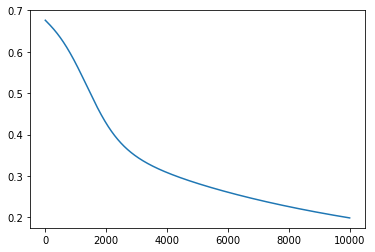

In [16]:
x=tf.placeholder(tf.float32,[None,n_input])
y=tf.placeholder(tf.float32,[None,n_output])

pred=build_model(x,weights,bias)
loss=tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y)
loss=tf.reduce_mean(loss)
opt=tf.train.GradientDescentOptimizer(0.001).minimize(loss)

init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)
record=[]
for i in range(10000):
    _,l=sess.run([opt,loss],feed_dict={x:train_X,y:train_y})

    record.append(l)
    
plt.plot(record)
plt.show()